## **Importing Basic Modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
plt.style.use('ggplot')

# **Drawing Insights From Data**

In [ ]:
data= pd.read_csv('/content/Product Reviews.csv')
data.head()

,User Id,Product Id,Rating(out of 5),Review Paragraph,Scrape Timestamp,Source
0,206819,69174,1,"I've used it for over a month, and I love it. ...",20-01-2025 14:13,Yelp
1,464924,86973,5,"I got this as a gift, and it's satisfied. It d...",20-01-2025 13:49,AliExpress
2,974753,82929,3,"used it for over a month, and I regret buying ...",20-01-2025 13:43,AliExpress
3,461644,35853,5,"This is my second purchase from Yelp, and as u...",20-01-2025 13:32,AliExpress
4,742399,36090,5,"Bought this from AliExpress, and I must say I'...",20-01-2025 14:26,AliExpress


In [ ]:
data.shape

(5403, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User Id           5403 non-null   int64 
 1   Product Id        5403 non-null   int64 
 2   Rating(out of 5)  5403 non-null   int64 
 3   Review Paragraph  5403 non-null   object
 4   Scrape Timestamp  5403 non-null   object
 5   Source            5403 non-null   object
dtypes: int64(3), object(3)
memory usage: 253.4+ KB


In [ ]:
review_count = data["Rating(out of 5)"].value_counts()
review_count

,count
Rating(out of 5),
5,3384
4,763
1,523
3,420
2,313


# **Data Cleaning**

In [116]:
print(data.isnull().sum)

<bound method DataFrame.sum of       User Id  Product Id  Rating(out of 5)  Review Paragraph  \
0       False       False             False             False   
1       False       False             False             False   
2       False       False             False             False   
3       False       False             False             False   
4       False       False             False             False   
...       ...         ...               ...               ...   
5398    False       False             False             False   
5399    False       False             False             False   
5400    False       False             False             False   
5401    False       False             False             False   
5402    False       False             False             False   

      Scrape Timestamp  Source   Date  
0                False   False  False  
1                False   False  False  
2                False   False  False  
3                False   Fal

In [117]:
data.duplicated().sum()

0

In [ ]:
dataf = data[data["Scrape Timestamp"] != "Invalid Date"]
data["Scrape Timestamp"] = pd.to_datetime(data["Scrape Timestamp"], format="%d-%m-%Y %H:%M", errors="coerce")
data.dropna(subset=["Scrape Timestamp"], inplace=True)

data["Date"] = data["Scrape Timestamp"].dt.date


# **Visualization**

<ipython-input-103-188626655f58>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Rating(out of 5)"], palette="viridis")


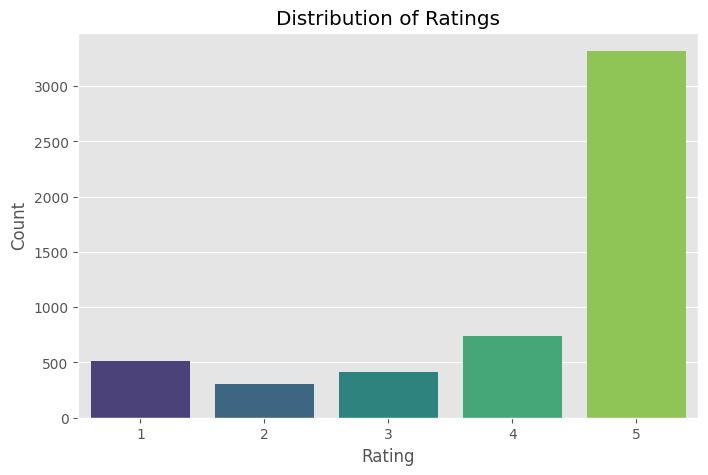

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data["Rating(out of 5)"], palette="viridis")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

<ipython-input-104-476870071190>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["Source"].value_counts().index, x=data["Source"].value_counts(), palette="mako")


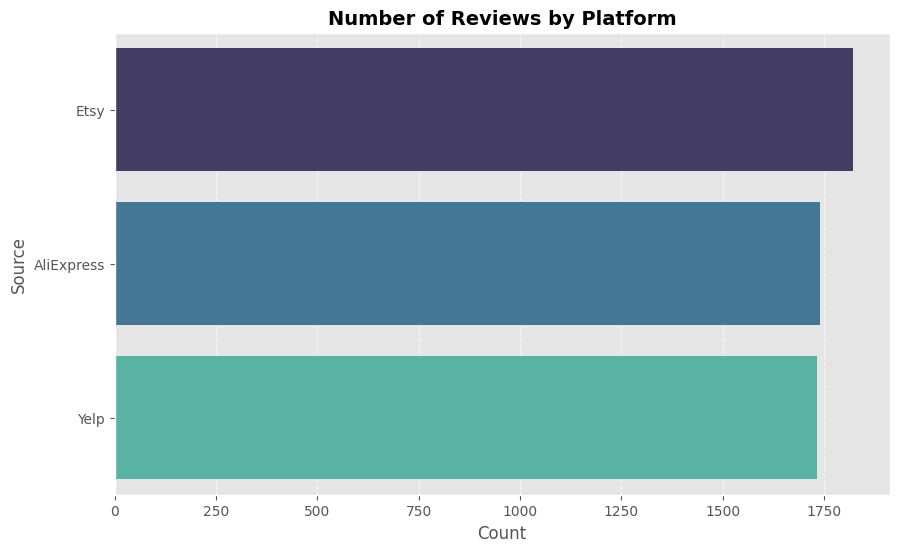

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=data["Source"].value_counts().index, x=data["Source"].value_counts(), palette="mako")
plt.title("Number of Reviews by Platform", fontsize=14, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Source", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



<ipython-input-105-b67b4122b471>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


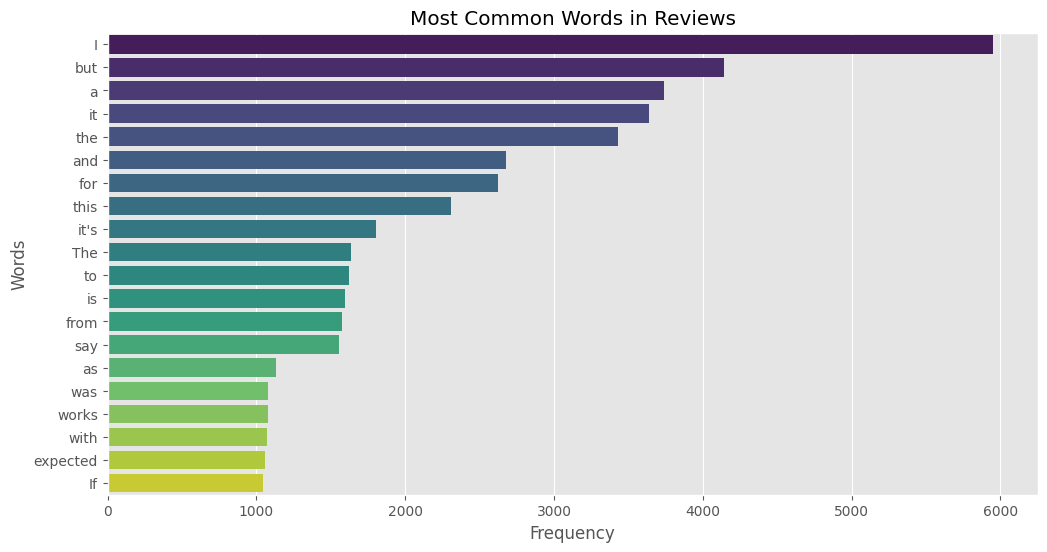

In [ ]:
# Word Frequency Bar Chart
from collections import Counter

# Tokenizing words from review texts
all_words = " ".join(data["Review Paragraph"].dropna()).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # Get top 20 words
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Most Common Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

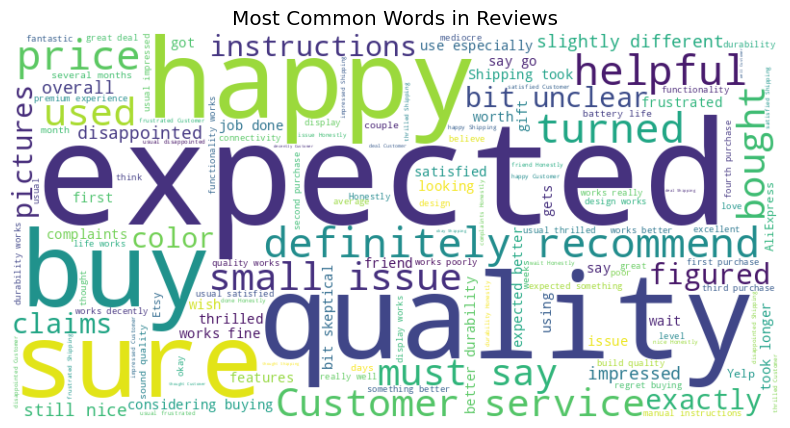

In [ ]:
# Word Cloud for Review Texts
from wordcloud import WordCloud
text = " ".join(review for review in data["Review Paragraph"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


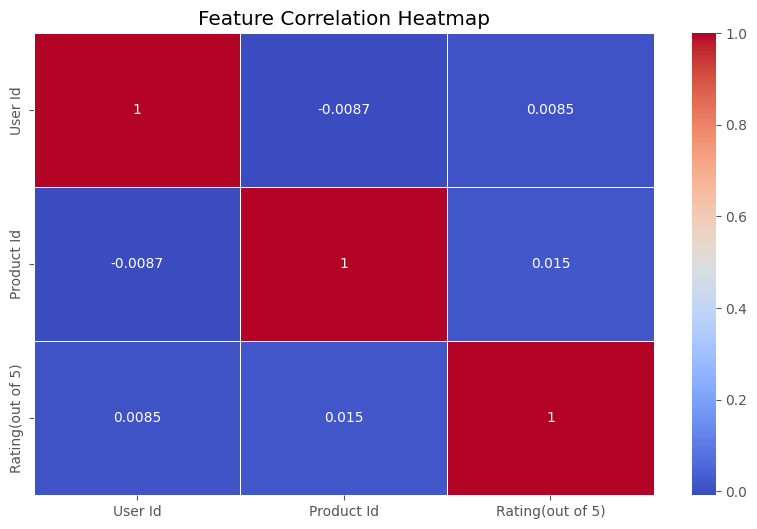

In [ ]:
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

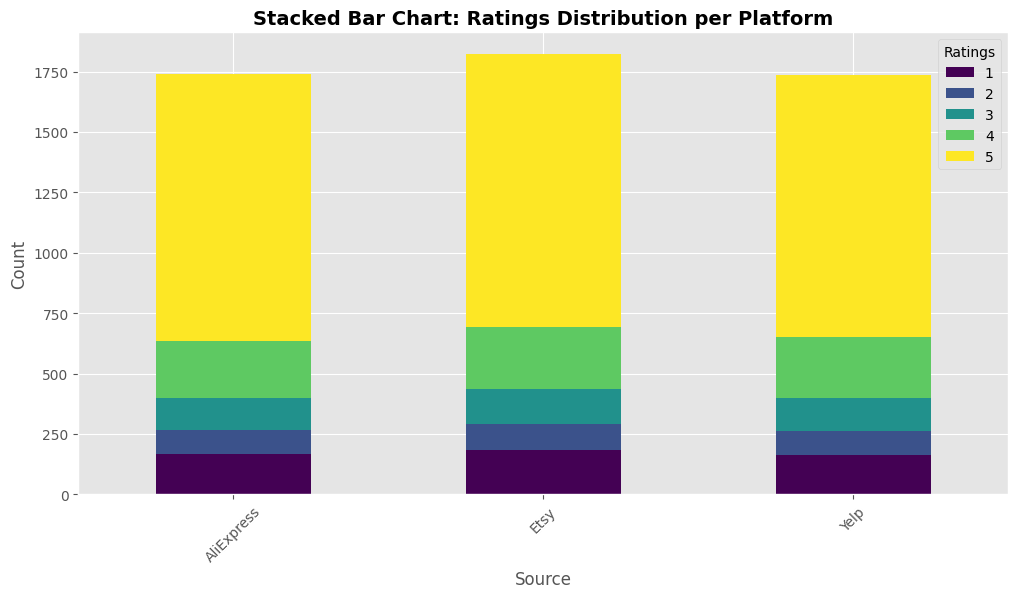

In [ ]:
rating_distribution = data.groupby(["Source", "Rating(out of 5)"]).size().unstack()

rating_distribution.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Stacked Bar Chart: Ratings Distribution per Platform", fontsize=14, fontweight="bold")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Ratings", bbox_to_anchor=(1, 1))
plt.show()

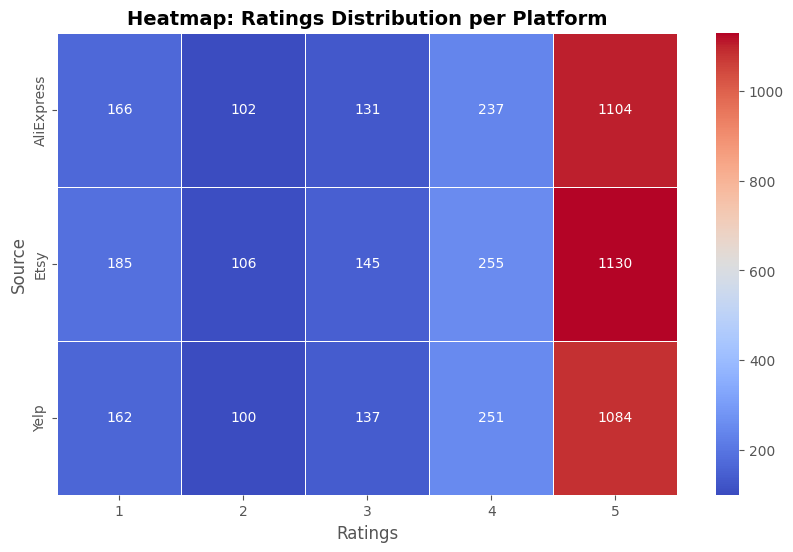

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(rating_distribution, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap: Ratings Distribution per Platform", fontsize=14, fontweight="bold")
plt.xlabel("Ratings")
plt.ylabel("Source")
plt.show()

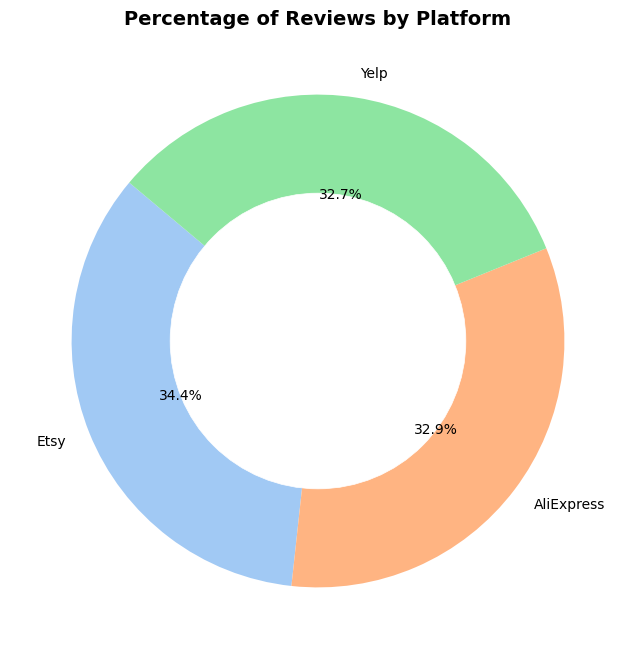

In [ ]:
platform_counts = data["Source"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.gca().add_artist(plt.Circle((0,0), 0.6, color='white'))  # Creating the donut effect
plt.title("Percentage of Reviews by Platform", fontsize=14, fontweight="bold")
plt.show()


# **Basic Text Processing Using NLTK**

In [ ]:
example = data['Review Paragraph'].iloc[49]
print(example)

Honestly, for the price, I expected something better, but it turned out to be frustrated. The instructions were a bit unclear, but I figured it out..


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# splitting text into words and conjunctions or simply tokens
nltk.word_tokenize(example)

['Honestly',
 ',',
 'for',
 'the',
 'price',
 ',',
 'I',
 'expected',
 'something',
 'better',
 ',',
 'but',
 'it',
 'turned',
 'out',
 'to',
 'be',
 'frustrated',
 '.',
 'The',
 'instructions',
 'were',
 'a',
 'bit',
 'unclear',
 ',',
 'but',
 'I',
 'figured',
 'it',
 'out',
 '..']

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:8]

['Honestly', ',', 'for', 'the', 'price', ',', 'I', 'expected']

In [ ]:
# part of speech tagging
nltk.download('averaged_perceptron_tagger', force=True)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Honestly', 'RB'),
 (',', ','),
 ('for', 'IN'),
 ('the', 'DT'),
 ('price', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ('expected', 'VBD'),
 ('something', 'NN'),
 ('better', 'RBR')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  Honestly/RB
  ,/,
  for/IN
  the/DT
  price/NN
  ,/,
  I/PRP
  expected/VBD
  something/NN
  better/RBR
  ,/,
  but/CC
  it/PRP
  turned/VBD
  out/RP
  to/TO
  be/VB
  frustrated/VBN
  ./.
  The/DT
  instructions/NNS
  were/VBD
  a/DT
  bit/NN
  unclear/JJ
  ,/,
  but/CC
  I/PRP
  figured/VBD
  it/PRP
  out/RP
  ../NN)
